# W1M1 - mtcars 데이터셋 분석하기

In [5]:
import pandas as pd
import matplotlib. pyplot as plt

In [21]:
mtcars = pd.read_csv('mtcars.csv')

## 데이터셋의 결과 출력하기

In [22]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
mtcars.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [24]:
mtcars.shape

(32, 12)

Data 갯수(row count)는 32개 입니다.<br>
column은 12개 입니다.

In [25]:
mtcars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

### 이름없는 컬럼을 적절한 이름으로 변경하기

In [26]:
mtcars.rename(columns = {'Unnamed: 0' : 'Vehicles'}, inplace=True)

In [27]:
mtcars.columns # 이름이 바뀌었다!

Index(['Vehicles', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [84]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Vehicles  32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     int64  
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  gear      32 non-null     int64  
 11  carb      32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [29]:
mtcars.dtypes

Vehicles     object
mpg         float64
cyl           int64
disp        float64
hp            int64
drat        float64
wt          float64
qsec        float64
vs            int64
am            int64
gear          int64
carb          int64
dtype: object

In [85]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


info, describe의 차이는?<br>
---
**info** : 각 컬럼 별 non-null 개수, dtype<br>
**describe** : int, float (숫자형) 타입의 기본 통계량 기술

## Gear, Transmission(am)의 조합 구하기

In [39]:
mtcars['gear'].unique()

array([4, 3, 5])

gear는 3, 4, 5의 값을 갖는다

In [33]:
mtcars['am'].unique()

array([1, 0])

am은 0, 1의 값을 갖는다

### pd.crosstab을 이용한 조합 별 개수 구하기

In [135]:
g_a = pd.crosstab(mtcars['gear'], mtcars['am'])
g_a

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


pd.crosstab을 **사용하지 않고** 구현

In [171]:
# mtcars[['am', 'gear']].groupby('gear')['am'].value_counts()
mtcars['am'].astype(dtype=int)
mtcars['gear'].astype(dtype=int)
valCnt = mtcars[['am', 'gear']].groupby(['gear', 'am']).value_counts()
valCnt=valCnt.to_frame()
valCnt

count
gear am       
3    0      15
4    0       4
     1       8
5    1       5

In [172]:
# from itertools import product

# gear_trans = mtcars[['am', 'gear']]
# gear_trans

In [177]:
[tuple(map(int, valCnt.iloc[i].name)) for i in range(len(valCnt))]
# [valCnt['count'].iloc[i] for i in range(len(valCnt))]

[(3, 0), (4, 0), (4, 1), (5, 1)]

Text(0.5, 1.0, '# of Cars by Gear x Transmission')

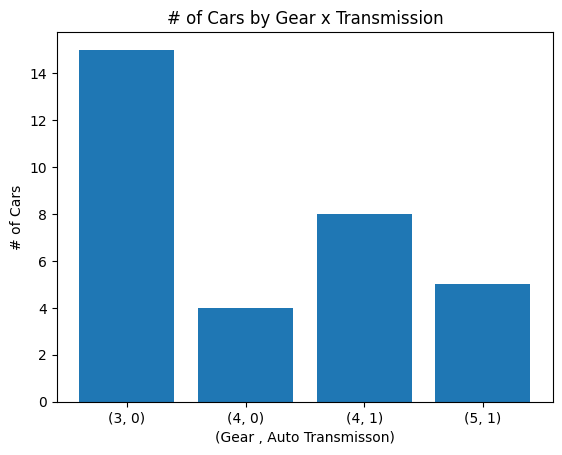

In [182]:
plt.bar([str(tuple(map(int, valCnt.iloc[i].name))) for i in range(len(valCnt))]
, [valCnt['count'].iloc[i] for i in range(len(valCnt))])
plt.xlabel('(Gear , Auto Transmisson)')
plt.ylabel('# of Cars')
plt.title('# of Cars by Gear x Transmission')

## 모든 features의 히스토그램 그리기

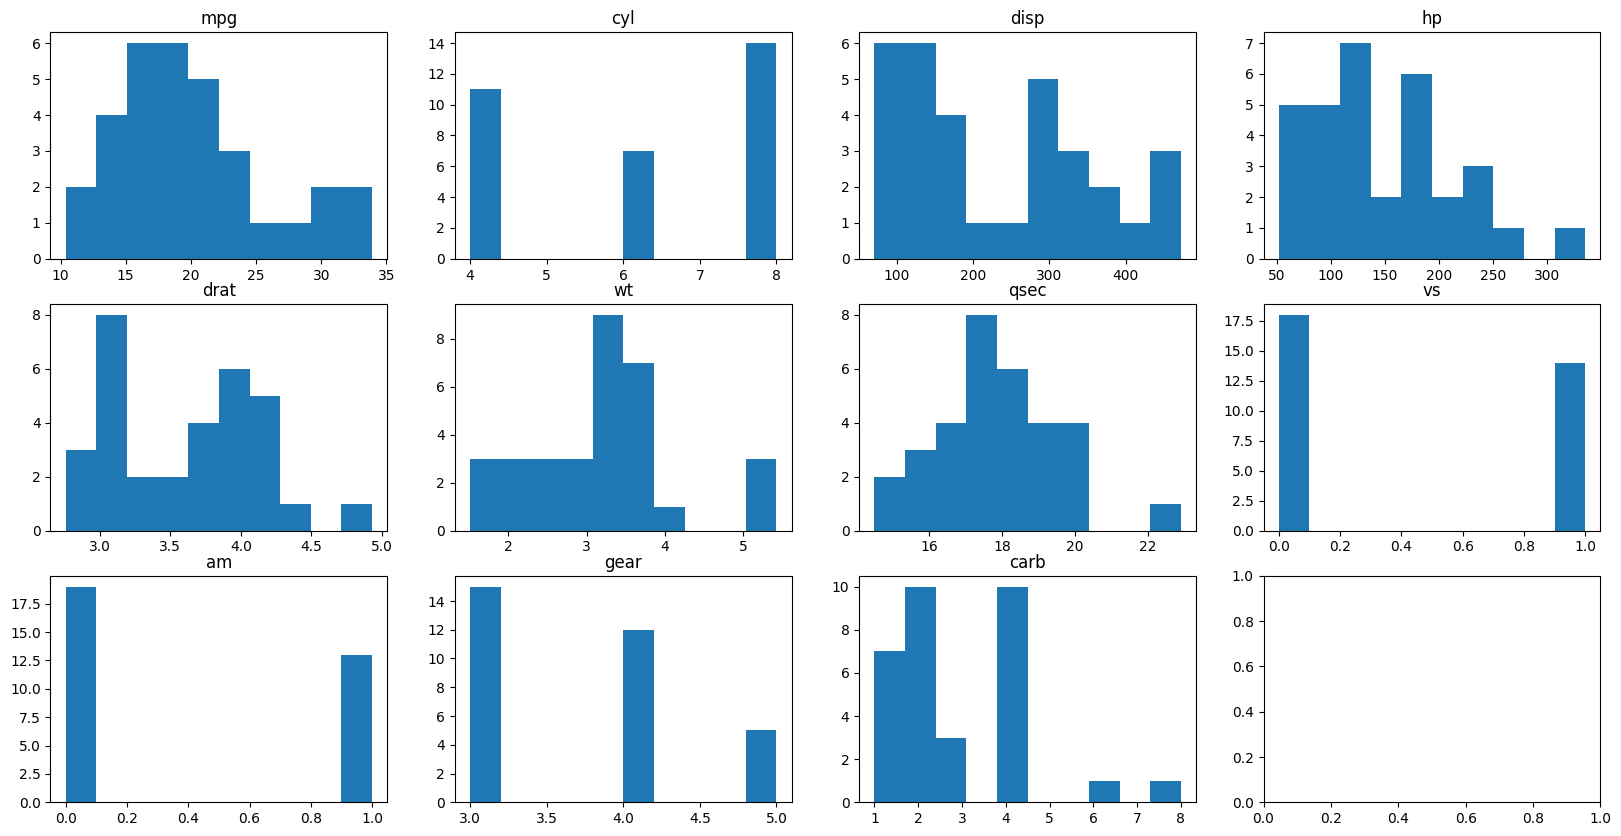

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=4,figsize=(20,10))
for i, c in enumerate(mtcars.columns[1:]):
    # print(i//4, i%4)
    axs[i//4, i%4].hist(mtcars[c])
    axs[i//4, i%4].set_title(c)
plt.show()

### Cylinder와 HorsePower 간의 상관 관계를 알아보기 위한 scatter plot

Text(0.5, 1.0, 'Cylinder vs Horse Power')

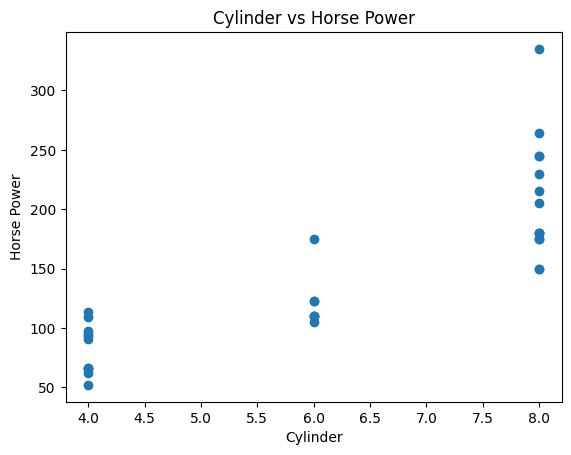

In [212]:
plt.scatter(mtcars['cyl'], mtcars['hp'])
plt.xlabel('Cylinder')
plt.ylabel('Horse Power')
plt.title('Cylinder vs Horse Power')

### MPG와 HorsePower 간의 상관 관계를 알아보기 위한 scatter plot

Text(0.5, 1.0, 'MPG vs Horse Power')

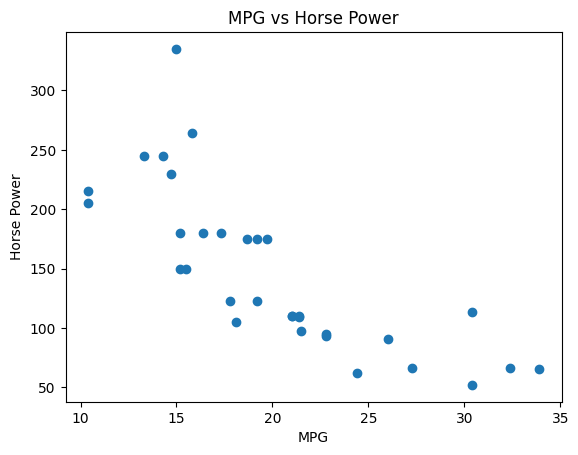

In [213]:
plt.scatter(mtcars['mpg'], mtcars['hp'])
plt.xlabel('MPG')
plt.ylabel('Horse Power')
plt.title('MPG vs Horse Power')

## 각 변수들 간의 상관 관계를 알아 보기 위해 상관계수를 구하는 표를 출력하기

In [218]:
mt = mtcars[mtcars.columns[1:]]
mt.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


- 이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?

- 변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.

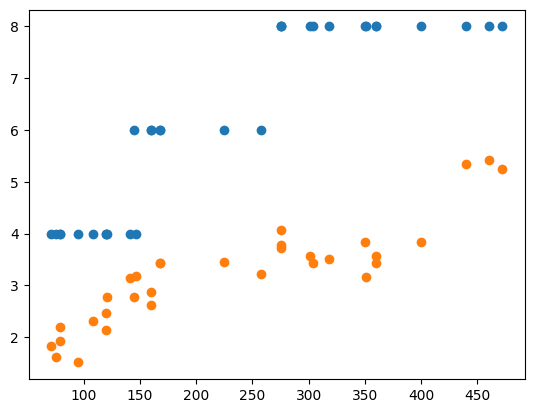

In [227]:
plt.scatter(mt['disp'], mt['cyl'])
plt.scatter(mt['disp'], mt['wt'])